In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Load data

In [112]:
data = pd.read_excel("Realized Schedule 20210101-20220208.xlsx", parse_dates = True)
data = data.sort_values(by = "ScheduleTime").reset_index(drop = True)
data

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,2021-01-01 06:05:00,CL,2707,YAD,73H,J,CA,189,0.026455
1,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451
2,2021-01-01 08:20:00,LJ,2831,DFW,320,J,US,186,0.139785
3,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189
4,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423
...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 21:40:00,CL,1496,ICL,7M8,J,US,197,0.406091
36766,2022-02-08 22:00:00,LJ,2396,YKA,320,J,CA,180,0.577778
36767,2022-02-08 22:40:00,CL,2961,YQU,7M8,J,CA,200,0.265000
36768,2022-02-08 22:50:00,CL,1392,YQL,73H,J,CA,189,0.322751


### Add Features to data

In [230]:
# holidays 
from pandas.tseries.holiday import *
# from pandas.tseries.offsets import CustomBusinessDay
# from pandas.tseries.offsets import *
# from pandas.tseries import offsets

class GothamBusinessCalendar(AbstractHolidayCalendar):
   rules = [
     Holiday('New Year', month=1, day=1, observance=sunday_to_monday),
     Holiday('Groundhog Day', month=1, day=6, observance=sunday_to_monday),
     Holiday('St. Patricks Day', month=3, day=17, observance=sunday_to_monday),
     Holiday('April Fools Day', month=4, day=1),
     Holiday('Good Friday', month=1, day=1, offset=[Easter(), Day(-2)]),
     Holiday('Labor Day', month=5, day=1, observance=sunday_to_monday),
     Holiday('Canada Day', month=7, day=1, observance=sunday_to_monday),
     Holiday('July 4th', month=7, day=4, observance=nearest_workday),
     Holiday('All Saints Day', month=11, day=1, observance=sunday_to_monday),
     Holiday('Christmas', month=12, day=25, observance=nearest_workday)
   ]



holidays = HolidayCalendar().holidays(min(data.Date), max(data.Date)).date

# Gotham_BD = CustomBusinessDay(calendar=GothamBusinessCalendar())

# add time stuff
data["Hour"] = data.ScheduleTime.dt.hour
data["Date"] = data.ScheduleTime.dt.date
data["Holiday"] = data.Date.isin(holidays)
data["Weekday"] = data.ScheduleTime.dt.day_name()
data["Month"] = data.ScheduleTime.dt.month_name()
data["Year"] = data.ScheduleTime.dt.year
data["YearMonth"] = data.Year.astype(str)+  data.Month

data["QuarterEnd"] = data.ScheduleTime.dt.to_period("Q").dt.end_time
data["MonthEnd"] = data.ScheduleTime.dt.to_period("M").dt.end_time
# data["BusinessMonthEnd"] = data.ScheduleTime.dt.to_period("BM").dt.end_time
data["TimeToQuarterEnd"] = (data["QuarterEnd"] - data["ScheduleTime"]).dt.days
data["TimeToMonthEnd"] = (data["MonthEnd"] - data["ScheduleTime"]).dt.days
# data["TimeToBusinessMonthEnd"] = (data["BusinessMonthEnd"] - data["ScheduleTime"]).dt.days
data["Passengers"] = data.SeatCapacity*data.LoadFactor
data

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor,Hour,...,QuarterEnd,MonthEnd,TimeToQuarterEnd,TimeToMonthEnd,Passengers,Month,N,Year,MonthYear,YearMonth
0,2021-01-01 06:05:00,CL,2707,YAD,73H,J,CA,189,0.026455,6,...,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30,5.0,January,1,2021,January2021,2021January
1,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451,6,...,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30,58.0,January,1,2021,January2021,2021January
2,2021-01-01 08:20:00,LJ,2831,DFW,320,J,US,186,0.139785,8,...,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30,26.0,January,1,2021,January2021,2021January
3,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189,10,...,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30,14.0,January,1,2021,January2021,2021January
4,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423,12,...,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30,81.0,January,1,2021,January2021,2021January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 21:40:00,CL,1496,ICL,7M8,J,US,197,0.406091,21,...,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20,80.0,February,1,2022,February2022,2022February
36766,2022-02-08 22:00:00,LJ,2396,YKA,320,J,CA,180,0.577778,22,...,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20,104.0,February,1,2022,February2022,2022February
36767,2022-02-08 22:40:00,CL,2961,YQU,7M8,J,CA,200,0.265000,22,...,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20,53.0,February,1,2022,February2022,2022February
36768,2022-02-08 22:50:00,CL,1392,YQL,73H,J,CA,189,0.322751,22,...,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20,61.0,February,1,2022,February2022,2022February


## Visualisations



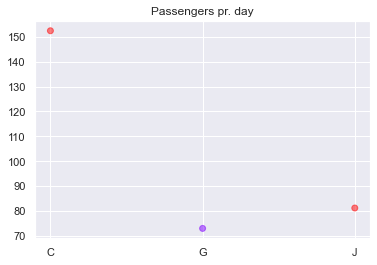

In [223]:
# data["N"] = 1
d = data.groupby("FlightType").mean()
plt.scatter(d.index, d.Passengers/d.N, c = d.Holiday > 0, alpha = .5, cmap = "rainbow")
plt.title("Passengers pr. day")
plt.show()

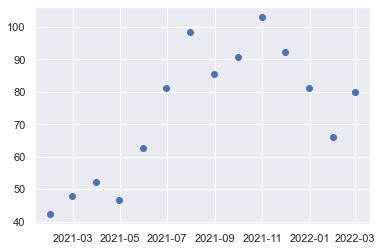

1.563502629259028

In [245]:
data.index = data.ScheduleTime
d = data.groupby(pd.Grouper(freq="M")).mean()
plt.scatter(d.index, d.Passengers)
plt.show()

_d = d[d.index.month == 1].Passengers
_d[1]/_d[0]

In [244]:
d

,FlightNumber,SeatCapacity,LoadFactor,Hour,Holiday,TimeToQuarterEnd,TimeToMonthEnd,Passengers,N,Year
ScheduleTime,,,,,,,,,,
2021-01-31,997706,148527,315.561532,13164,102,77229,17639,42611.0,1010,2041210
2021-02-28,540699,90249,234.202016,7842,24,26763,8039,28948.0,604,1220684
2021-03-31,688673,111805,331.489007,10264,20,11281,11281,41181.0,791,1598611
2021-04-30,856331,140675,346.346014,12595,73,72827,14145,44740.0,962,1944202
2021-05-31,1208268,184966,586.689816,16559,82,55532,17582,79127.0,1265,2556565
2021-06-30,2361334,320673,1143.745155,26953,91,27506,27506,170297.0,2101,4246121
2021-07-31,4373712,572106,2246.902013,47118,354,275535,53251,359314.0,3644,7364524
2021-08-31,4773179,625551,2169.136894,52585,0,179312,59372,341332.0,3998,8079958
2021-09-30,5333025,681551,2515.759766,57627,161,62969,62969,397375.0,4375,8841875


## Some metrics

In [95]:
data.Airline.value_counts()
data.Sector.value_counts()
# data.FlightType.value_counts()

CA    17906
US    17575
IS      450
QA      345
AE      165
DK       95
SG       95
EG       88
CN       44
IQ        3
NL        1
MX        1
Name: Sector, dtype: int64

In [48]:
data[data.Sector == "DK"]

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
536,2021-01-13 11:25:00,DO,811,CPH,333,J,DK,262,0.145038
764,2021-01-21 12:25:00,DO,811,CPH,333,J,DK,262,0.030534
922,2021-01-28 11:15:00,DO,811,CPH,333,J,DK,262,0.030534
987,2021-01-31 12:00:00,DO,811,CPH,333,J,DK,262,0.045802
1056,2021-02-03 11:25:00,DO,811,CPH,333,J,DK,262,0.030534
...,...,...,...,...,...,...,...,...,...
35657,2022-01-30 13:00:00,DO,811,CPH,333,J,DK,262,0.099237
35783,2022-01-31 12:35:00,DO,811,CPH,333,J,DK,262,0.068702
36342,2022-02-05 12:05:00,DO,811,CPH,333,J,DK,262,0.194656
36449,2022-02-06 12:30:00,DO,811,CPH,333,J,DK,262,0.141221


In [41]:
# data = data_org.copy()
X = data.loc[:,:"SeatCapacity"]
y = data["LoadFactor"]

X

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity
0,2021-01-01 06:05:00,CL,2707,YAD,73H,J,CA,189
1,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142
2,2021-01-01 08:20:00,LJ,2831,DFW,320,J,US,186
3,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74
4,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142
...,...,...,...,...,...,...,...,...
36765,2022-02-08 21:40:00,CL,1496,ICL,7M8,J,US,197
36766,2022-02-08 22:00:00,LJ,2396,YKA,320,J,CA,180
36767,2022-02-08 22:40:00,CL,2961,YQU,7M8,J,CA,200
36768,2022-02-08 22:50:00,CL,1392,YQL,73H,J,CA,189


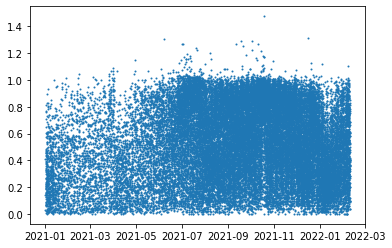

In [26]:
plt.scatter(data.ScheduleTime, data.LoadFactor, s = 1)

## data class


In [72]:
from dataloader import DataLoader
import copy

data_loader = DataLoader()
d = copy.deepcopy(data_loader)
# df = data_loader.get_subset("Hour", "Passengers").standardize().onehot_encode()
# df.data

In [79]:
data_loader = copy.deepcopy(d)

cols_to_standardize = ["SeatCapacity"]
cols_to_onehot = ["Airline", "Destination", "Sector"]
cols_to_use = ["ScheduleTime"] + cols_to_standardize + cols_to_onehot + []

# retrive cols to use
data_loader.special_transforms()
data_loader = data_loader.get_subset(*cols_to_use)

# make one hot encoding
data_loader = data_loader.onehot_encode(*cols_to_onehot)

# get train-test split
train, test = data_loader.get_split()
train.data = train.data.loc[:, ~data_loader.data.columns.isin(["ScheduleTime"]) ]
test.data = test.data.loc[:, ~data_loader.data.columns.isin(["ScheduleTime"]) ]

# standardize
test = test.standardize(train.data, *cols_to_standardize)
train = train.standardize(None, *cols_to_standardize)
train.data

,SeatCapacity,Airline_5M,Airline_AY,Airline_BJ,Airline_BT,Airline_BZ,Airline_CD,Airline_CL,Airline_CN,Airline_DO,...,Sector_CN,Sector_DK,Sector_EG,Sector_IQ,Sector_IS,Sector_MX,Sector_NL,Sector_QA,Sector_SG,Sector_US
0,0.574738,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.222588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.523845,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.376168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.222588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35835,2.457787,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35836,-1.410096,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
35837,-1.104737,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35838,0.574738,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
d2 = copy.deepcopy(d)

# d2.onehot_encode("Hour")
# d.data.loc[d2.data["Hour_22"].isna()]
# d2.data

pd.get_dummies(d2.data["Hour"])

,0,10,11,12,13,14,15,16,17,18,...,21,22,23,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39444,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39445,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39446,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
39447,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


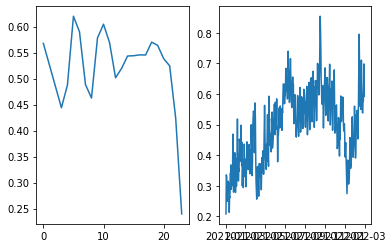

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)

d = data_loader.data.groupby("Hour").mean()
d.index = d.index.astype(int)
d = d.sort_values(by = "Hour")
ax[0].plot(d["LoadFactor"])

d = data_loader.data.groupby("Date").mean()
# d.index = d.index.astype(int)
d = d.sort_values(by = "Date")
ax[1].plot(d["LoadFactor"])
# data_loader.data.dtypes

In [26]:
from datetime import datetime
data_loader.data.ScheduleTime.dt.date.apply(lambda x: datetime.strftime(x, "%d-%m"))

0        01 01
1        01 01
2        01 01
3        01 01
4        01 01
         ...  
39444    28 02
39445    28 02
39446    28 02
39447    28 02
39448    28 02
Name: ScheduleTime, Length: 39449, dtype: object

In [73]:
# data_loader = DataLoader()
df = data_loader.get_subset("Hour", "Passengers").standardize().onehot_encode()
# df.data.dtypes == np.number
# df.data.dtypes
df.data


# list(data_loader.data.columns[data_loader.data.dtypes == np.number])



,Hour,Passengers
0,6,5.0
1,6,58.0
2,8,26.0
3,10,14.0
4,12,81.0
...,...,...
39444,21,28.0
39445,21,127.0
39446,22,5.0
39447,22,166.0


In [89]:
data_loader.data.columns[data_loader.data.dtypes.isin([np.float64, np.number, np.int64])]
# data_loader.data.dtypes == np.number

Index(['SeatCapacity', 'LoadFactor', 'Hour', 'Year', 'TimeToQuarterEnd',
       'TimeToMonthEnd', 'Passengers'],
      dtype='object')